# Setup

Running the simulations presumes the installation of specific packages, in particular Gammapy0.19. The easiest is maybe to simply recreate my conda environment, and run this notebook from there. Download the file env_swyft3-ext.yaml, and write the following in the terminal:

```
$conda env create --file env_swyft3-ext.yaml --name swyft3
$conda activate swyft3
```
Then download the IRF file *Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits* and *ALP_quick_sim.py*. If you place them in the same directory as this notebook, you should be set to run. Otherwise adapt the paths in the following cell:


In [1]:
import os
irf_file = "Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits"    # The path to the IRF_file (relative to this notebook)
ALP_file_dir = ""             # The directory where ALP_quick_sim.py is placed. Can be empty if it's in same folder as notebook. 

In [2]:
import sys
if ALP_file_dir: sys.path.append(ALP_file_dir) 
from ALP_quick_sim import ALP_sim

In [14]:
import numpy as np

# Running simulations

The model function is part of the class ``ALP_sim``, so you need to make an object of that class first. 

In [3]:
A = ALP_sim()

The model is dependent on an Instrument Response Function, defined by a fits file. The file is specified as follows:

In [4]:
A.configure_obs(irf_file = irf_file )

If this is a nuisance, the IRF file can easily be set as default in the ``ALP_sim.__init__()`` in the file *ALP_quick_sim.py*. Incidentally, the same goes for any other configurations.  

For the sake of this demonstration, I'll  set the seed of the random magnetic field configurations in the Perseus cluster, for consistent results. 

In [77]:
A.configure_model(ALP_seed=0)

Here I am ignoring all nuisance parameters, thus there are only two input parameters [m, g] (mass and coupling of ALPs):

In [78]:
params = [10,10]

Now to make a simulation, simply run ``A.model(params)``:

In [79]:
expected_observation = A.model(params)
print(expected_observation)

{'y': array([0.00000000e+00, 0.00000000e+00, 3.24757731e+00, 2.50641493e+01,
       1.93949645e+02, 4.72820745e+02, 5.60566456e+02, 6.00775466e+02,
       5.88547178e+02, 5.73751459e+02, 5.25711903e+02, 4.52138163e+02,
       3.68122462e+02, 2.77091239e+02, 2.05977977e+02, 1.60812328e+02,
       1.25098289e+02, 9.45121357e+01, 7.09766878e+01, 5.25205239e+01,
       3.80139458e+01, 3.12295015e+01, 2.27685001e+01, 1.62094153e+01,
       1.14980493e+01, 7.66422221e+00, 5.39615737e+00, 3.63099111e+00,
       2.42029467e+00, 1.63170465e+00, 1.06526470e+00, 7.43193638e-01,
       5.48069660e-01, 4.61470945e-01, 4.17701146e-01, 3.60170068e-01,
       2.94449206e-01, 2.40570521e-01, 1.94932035e-01, 1.57221703e-01,
       1.34053766e-01, 1.21224376e-01, 1.13723798e-01, 1.14817636e-01,
       1.20207746e-01, 1.13933808e-01, 9.76157554e-02, 8.73245763e-02,
       8.52824180e-02, 8.70134829e-02])}


The noise function is called ``A.noise()``. In principle it only takes in the expected observation (generated using ``A.model()``), but SWYFT v0.3.2 requires the input parameters to be part of the function call as well): 

In [80]:
simulated_observation = A.noise(expected_observation, params)
print(simulated_observation)

{'y': array([  0.,   0.,   2.,  28., 186., 475., 588., 576., 579., 562., 550.,
       448., 336., 283., 204., 176., 123.,  94.,  69.,  42.,  39.,  39.,
        20.,  19.,  14.,   7.,   8.,   5.,   2.,   3.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.])}


And that's it! There are several versions of the model, for example one that takes in parameter values on a logarithmic scale instead:

In [81]:
params_log = [1,1]
expected_observation_log = A.model_log(params_log)
print(expected_observation_log)

{'y': array([0.00000000e+00, 0.00000000e+00, 3.24757731e+00, 2.50641493e+01,
       1.93949645e+02, 4.72820745e+02, 5.60566456e+02, 6.00775466e+02,
       5.88547178e+02, 5.73751459e+02, 5.25711903e+02, 4.52138163e+02,
       3.68122462e+02, 2.77091239e+02, 2.05977977e+02, 1.60812328e+02,
       1.25098289e+02, 9.45121357e+01, 7.09766878e+01, 5.25205239e+01,
       3.80139458e+01, 3.12295015e+01, 2.27685001e+01, 1.62094153e+01,
       1.14980493e+01, 7.66422221e+00, 5.39615737e+00, 3.63099111e+00,
       2.42029467e+00, 1.63170465e+00, 1.06526470e+00, 7.43193638e-01,
       5.48069660e-01, 4.61470945e-01, 4.17701146e-01, 3.60170068e-01,
       2.94449206e-01, 2.40570521e-01, 1.94932035e-01, 1.57221703e-01,
       1.34053766e-01, 1.21224376e-01, 1.13723798e-01, 1.14817636e-01,
       1.20207746e-01, 1.13933808e-01, 9.76157554e-02, 8.73245763e-02,
       8.52824180e-02, 8.70134829e-02])}


In [82]:
prior_bounds = np.array(
    [[0,100],
    [0,100]]
)

In [83]:
import swyft.lightning as sl
import swyft

In [84]:
import torch
import torch.distributions as td

In [224]:
priors = dict(
    m = td.Uniform(5,15),
    g = td.Uniform(5,15)
)

In [231]:
truth = dict(
    m = 10,
    g = 0.8,
)

In [232]:
class Simulator(swyft.Simulator):
    def __init__(self, bounds = None):
        super().__init__()
        self.transform_samples = swyft.to_numpy32
        self.priors = priors
        self.truth = truth

    def sample_prior(self,):
        param_sample = [self.priors[key].sample() for key in self.priors.keys()]
        return torch.tensor(param_sample)
    
    def generate_observation(self,):
        vec = [self.truth[key] for key in self.truth.keys()]
        observation = dict(data = A.model(vec)['y'])
        return observation

    def generate_y(self,):
        vec = self.sample_prior()
        y = A.model(vec)
        return y['y']

    def build(self, graph):
        params = graph.node('params', self.sample_prior)
        data = graph.node('data', self.generate_y)
        

In [233]:
sim = Simulator()

In [234]:
import matplotlib.pyplot as plt

In [114]:
samples = sim.sample(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [235]:
store = sl.ZarrStore('./test_store_big')
store.init(
    N = 2_000,
    chunk_size=250,
    shapes=sim.get_shapes_and_dtypes()[0],
    dtypes=sim.get_shapes_and_dtypes()[1],
)

In [236]:
from joblib import Parallel, delayed

In [237]:
def simulate(simulator, n_sims_per_cpu):
    return store.simulate(simulator, max_sims=n_sims_per_cpu, batch_size=250)
# ray.shutdown()

In [238]:
while store.sims_required > 0:
    Parallel(n_jobs=8)(delayed(simulate)(sim, 250) for _ in range(8))

100%|██████████| 250/250 [20:23<00:00,  4.89s/it]


In [239]:
class SimpleDenseResidualBlock(torch.nn.Sequential):
    def __init__(self, in_channels, growth_rate):
        super(SimpleDenseResidualBlock, self).__init__(
            torch.nn.Conv1d(in_channels, growth_rate, kernel_size=1, padding=1),
            torch.nn.BatchNorm1d(growth_rate),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv1d(growth_rate, in_channels, kernel_size=1, padding=1),
            torch.nn.BatchNorm1d(in_channels)
        )
 
    def forward(self, x):
        out = super(SimpleDenseResidualBlock, self).forward(x)
        out = x + out  # Residual connection
        return out

In [240]:
class Network(sl.SwyftModule):
    def __init__(self):
        super().__init__()
        self.CNN = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=4)
        self.flatten = torch.nn.Flatten(1)
        self.compress = torch.nn.LazyLinear(32)
        self.logratios_1d = sl.LogRatioEstimator_1dim(num_features=32,
                                                     num_params=2,
                                                     hidden_features=16,
                                                     dropout=0.2,
                                                     varnames = 'params')

    def forward(self, A, B):
        data = self.CNN(A['data'].unsqueeze(1))
        data = self.flatten(data)
        data = self.compress(data)
        params = B['params']
        logratios = self.logratios_1d(data, params)
        return logratios

In [241]:
trainer = sl.SwyftTrainer(
    accelerator = 'cpu', precision = 64
)

  setup.py: 163 --- INFO: GPU available: False, used: False
  setup.py: 166 --- INFO: TPU available: False, using: 0 TPU cores
  setup.py: 169 --- INFO: IPU available: False, using: 0 IPUs
  setup.py: 172 --- INFO: HPU available: False, using: 0 HPUs


In [242]:
dm = swyft.SwyftDataModule(samples, batch_size=128)

In [243]:
train_data, val_data = store.get_dataloader

TypeError: cannot unpack non-iterable method object

In [244]:
network = Network()

/home/gert/anaconda3/envs/swyft4-dev/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [245]:
trainer.fit(network, dm)

/home/gert/anaconda3/envs/swyft4-dev/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
callback_connector.py: 222 --- INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
model_summary.py:  83 --- INFO: 
  | Name         | Type                   | Params
--------------------------------------------------------
0 | CNN          | Conv1d                 | 5     
1 | flatten      | Flatten                | 0     
2 | compress     | LazyLinear             | 0     
3 | logratios_1d | LogRatioEstimator_1dim | 3.6 K 
--------------------------------------------------------
3.6 K     Trainable params
0         Non-trainable params
3.6 K     Total params
0.028     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/gert/anaconda3/envs/swyft4-dev/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/gert/anaconda3/envs/swyft4-dev/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/gert/anaconda3/envs/swyft4-dev/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (7) is small

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Reloading best model: /home/gert/NRE_with_Slurm/check_model/tutorial/lightning_logs/version_6/checkpoints/epoch=19-step=140.ckpt


In [246]:
prior_samples = sim.sample(100_000, targets=['params'])

  0%|          | 0/100000 [00:00<?, ?it/s]

In [247]:
observation = sim.generate_observation()
observation = sl.Sample(observation)

In [248]:
observation

Sample({'data': array([0.00000000e+00, 0.00000000e+00, 3.24757731e+00, 2.57293815e+01,
       2.03076629e+02, 4.91389577e+02, 5.85743462e+02, 6.20900657e+02,
       6.04631509e+02, 5.93181630e+02, 5.55976562e+02, 4.92699309e+02,
       4.05970488e+02, 3.08404480e+02, 2.25794844e+02, 1.68396175e+02,
       1.28635422e+02, 9.98183045e+01, 7.70105552e+01, 5.79080708e+01,
       4.15784661e+01, 3.40262039e+01, 2.45530463e+01, 1.75376703e+01,
       1.25743434e+01, 8.37783071e+00, 5.90726090e+00, 3.94297399e+00,
       2.60154291e+00, 1.73961293e+00, 1.11072969e+00, 7.63509960e-01,
       5.54955262e-01, 4.63571027e-01, 4.18319931e-01, 3.60302394e-01,
       2.94471074e-01, 2.40572241e-01, 1.94932174e-01, 1.57221711e-01,
       1.34053766e-01, 1.21224376e-01, 1.13723798e-01, 1.14817636e-01,
       1.20207746e-01, 1.13933808e-01, 9.76157555e-02, 8.73245763e-02,
       8.52824182e-02, 8.70134829e-02])})

In [249]:
logratios = trainer.infer(
                        network,
                        observation,
                        prior_samples.get_dataloader(batch_size=2048)
                        )

callback_connector.py: 222 --- INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 7it [00:00, ?it/s]

In [250]:
logratios.params.shape

torch.Size([100000, 2, 1])

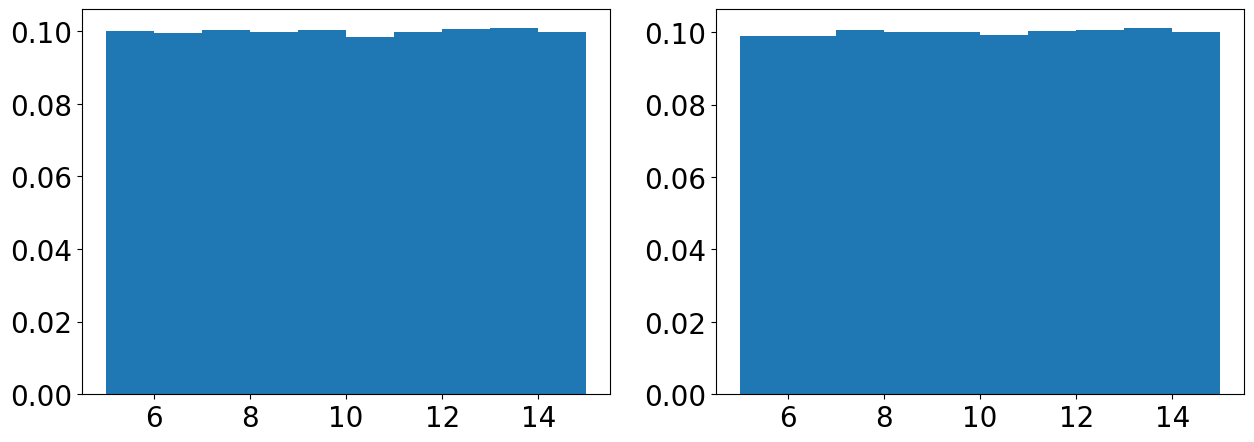

In [251]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in range(2):
    axs[i].hist(
        logratios.params[:,i,0],
        density=True,
        weights=np.exp(logratios.logratios[:,i])
    )

# Visualizing

There is also some convenient functionality for visualizing the simulations. First I configure the observations and the plots a little, so that the plots don't become too cluttered:

In [53]:
A.configure_obs(livetime=0.1) #A more realistic livetimewould be maybe 250, but then you can't really see anything on the plots. 
A.configure_plot(xmax=2e4, ymin=1e-1)

You can either simulate and visualize directly...

Total flux (counts): 5964.675910820651
Total flux (counts): 5430.375152633511
Total flux (counts): 5461.0


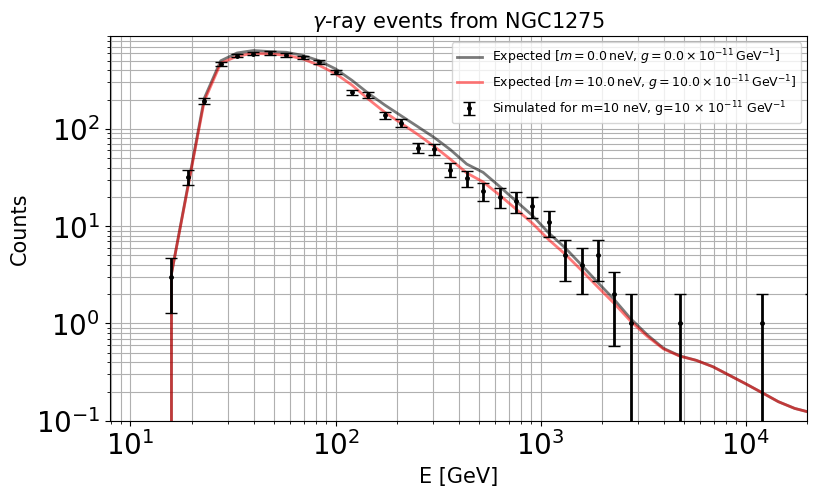

In [11]:
# Without ALPs, only expectations, not observations.
A.configure_model(ALP_seed=None, params = [0,0])
A.compute_case(new_fig=1,new_counts=1,plot_obs=0,color="k",linestyle="-",legend=1, model="")

# With ALPs, observations included.
A.configure_model(params = [10,10])  # Configuring the model parameters doesn't affect the use of A.model(). Other arguments of A.configure_model() do however affect A.model. 
A.compute_case(new_fig=0,new_counts=1,plot_obs=1,color="r",linestyle="-",legend=1, model="")

... or you can plot observations made earlier:

No expected counts specified for import, keeping any old ones
Total flux (counts): 5964.675910820634
Total flux (counts): 5419.150107093407


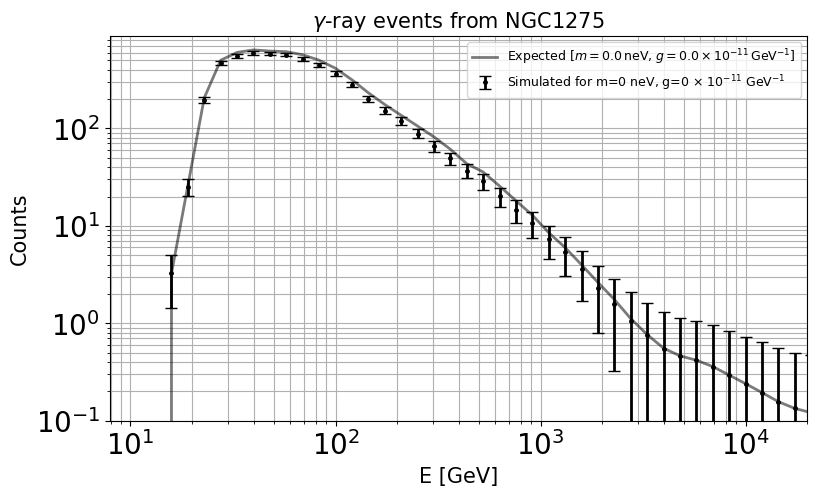

In [55]:
# Import the results from ealier
A.import_obs(obs=x)

# Configuring the parameters is now only to make sure the labels turn out right.
A.configure_model(params=[0,0])

A.compute_case(new_fig=1,new_counts=0,plot_obs=1,color="k",linestyle="-",legend=1, model="")
